In [ ]:
import pandas as pd
file = pd.read_csv("song_data.xls.csv")
df = pd.DataFrame(file)
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [ ]:
dfpopular = df[["song_name","song_popularity"]]
hit = dfpopular["song_popularity"].quantile(0.75)
df["is_Hit"] = (df["song_popularity"]>hit).astype(int)
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,is_Hit
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,1
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,0
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,1
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,1
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,0
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,0
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,0
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,0


In [ ]:
count_hits = df[df["is_Hit"] == 1].shape[0]
print(count_hits)


4451


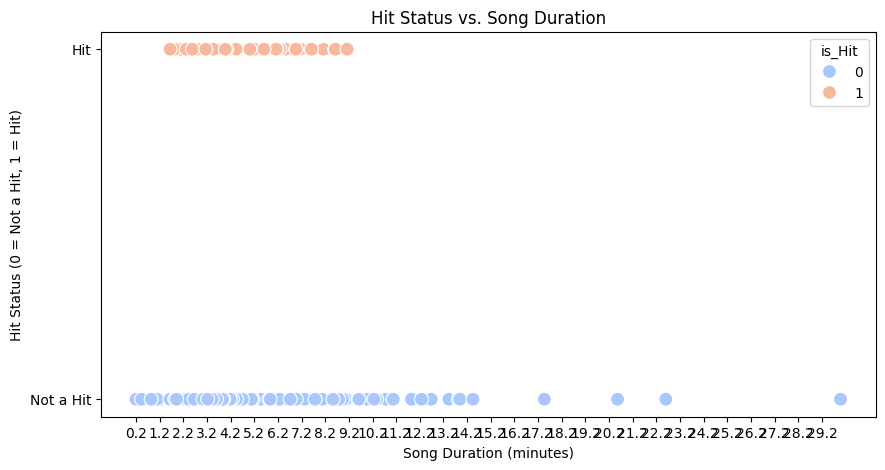

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df["song_duration_min"] = df["song_duration_ms"] / 60000

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["song_duration_min"], y=df["is_Hit"], hue=df["is_Hit"], palette="coolwarm", s=100)
plt.xticks(np.arange(df["song_duration_min"].min(), df["song_duration_min"].max(), step=1))

plt.xlabel("Song Duration (minutes)")
plt.ylabel("Hit Status (0 = Not a Hit, 1 = Hit)")
plt.title("Hit Status vs. Song Duration")
plt.yticks([0, 1], ["Not a Hit", "Hit"])  # Change y-axis labels

# Show plot
plt.show()


In [ ]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(columns=["song_name", "song_popularity"], axis=1)

x = df.drop(columns = ["is_Hit"],axis = 1)
y = df["is_Hit"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(max_depth=6,random_state=42)
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

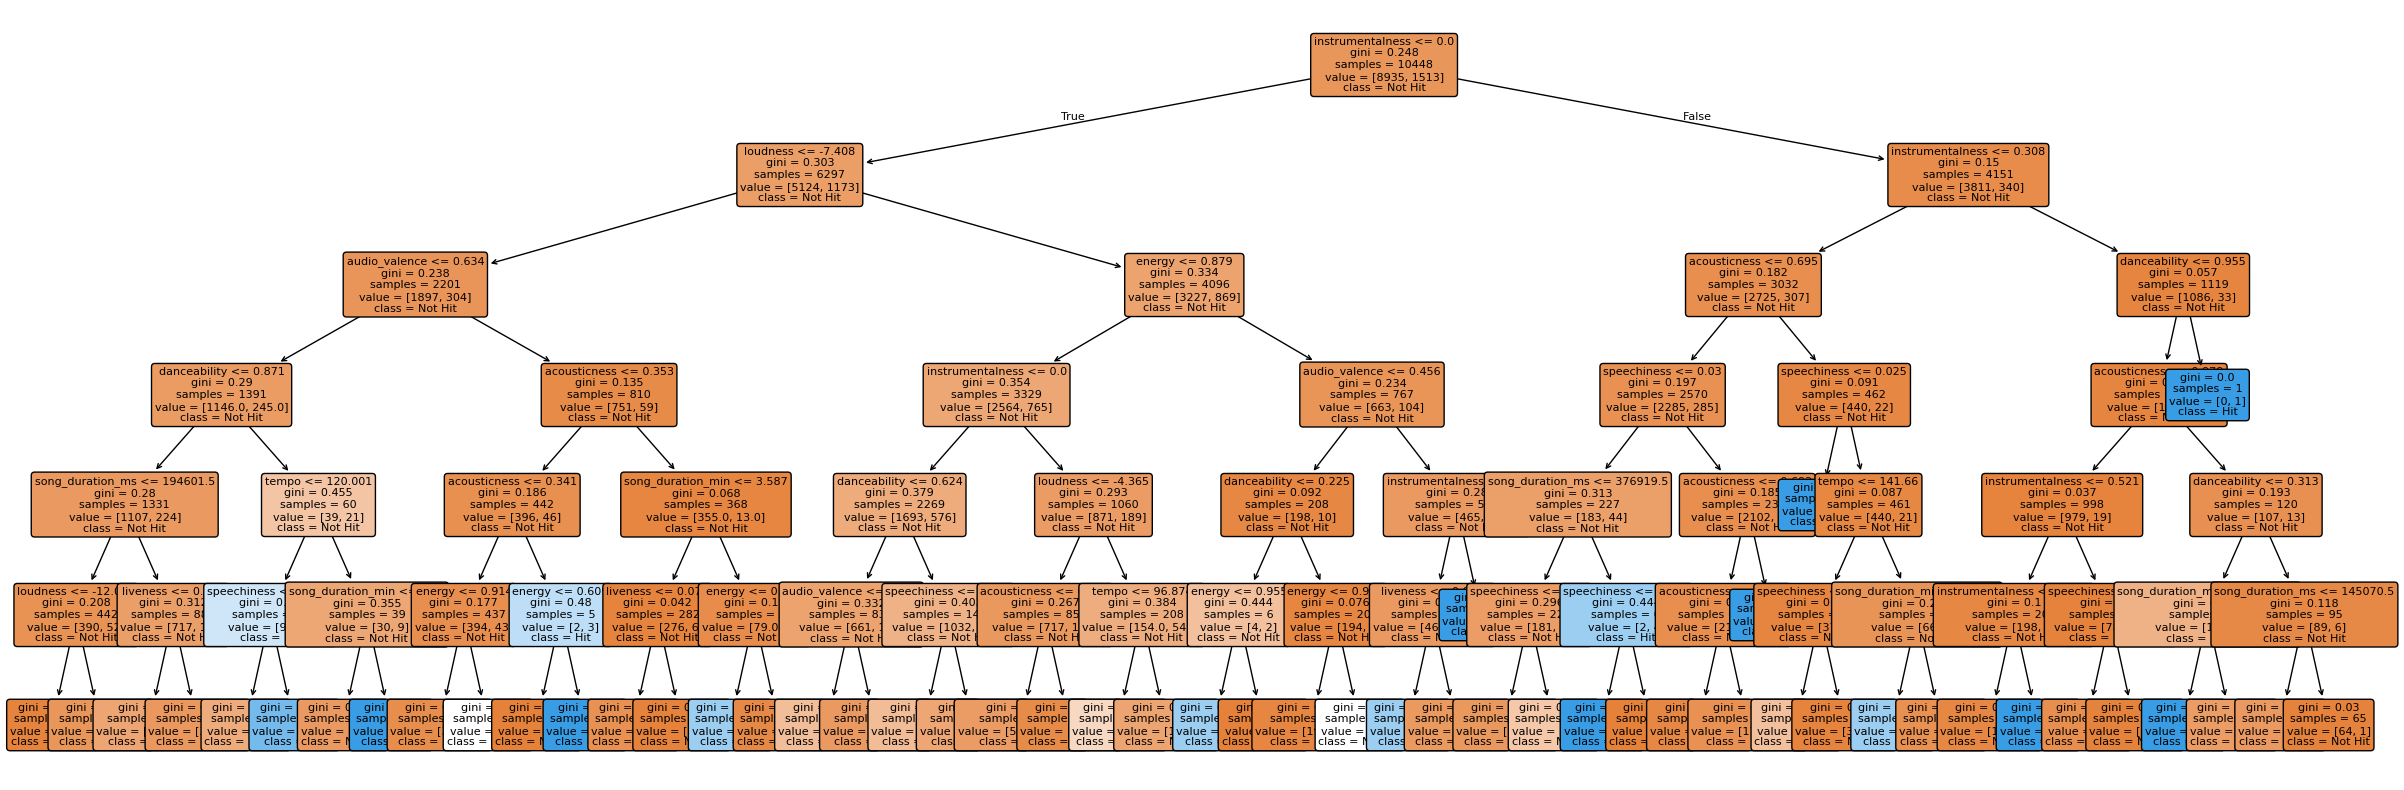

In [ ]:
plt.figure(figsize=(30,10))
plot_tree(model, feature_names=x.columns, class_names=["Not Hit", "Hit"], filled=True, rounded=True, fontsize=8)
plt.show()

Accuracy: 0.86 or 85.57 percent
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      3859
           1       0.00      0.00      0.00       619

    accuracy                           0.86      4478
   macro avg       0.43      0.50      0.46      4478
weighted avg       0.74      0.86      0.79      4478



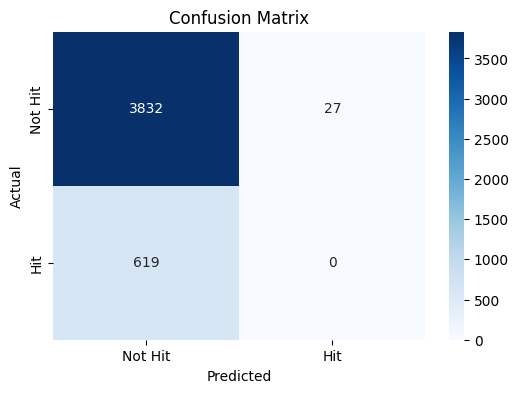

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f} or {accuracy*100:.2f} percent")
print("Classification Report:\n", classification_report(ytest, ypred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Hit", "Hit"], yticklabels=["Not Hit", "Hit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()